In [27]:
%load_ext autoreload
%autoreload 2

from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
from astroduet import config
from astropy import units as u
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def radial_profile(data, center):
    y,x = np.indices((data.shape)) # first determine radii of all pixels
    r = np.sqrt((x-center[0])**2+(y-center[1])**2)    

    # # radius of the image.
    r_max = np.max(r) 
    rad_pro, radius = np.histogram(r, weights=data, bins=np.int(r_max*1))
    nbins, radius = np.histogram(r, bins=np.int(r_max*1))
        
    return rad_pro, nbins, radius

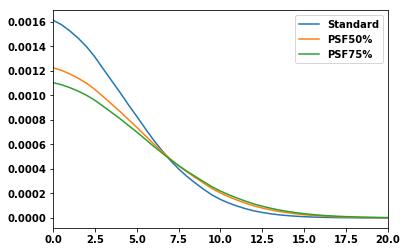

In [29]:
duet = config.Telescope()
pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.5*u.arcsec)
rind = np.arange(len(rad_pro))*pix_size

plt.plot(rind, rad_pro, label='Standard')

duet = config.Telescope(config='minimum_mass_50')

pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.5*u.arcsec)
rind = np.arange(len(rad_pro))*pix_size

plt.plot(rind, rad_pro, label='PSF50%')

duet = config.Telescope(config='minimum_mass_75')

pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.5*u.arcsec)
rind = np.arange(len(rad_pro))*pix_size

plt.plot(rind, rad_pro, label='PSF75%')

plt.xlim([0,20])

plt.legend()
plt.show()


In [21]:
def radial_profile(data, center):
    y,x = np.indices((data.shape)) # first determine radii of all pixels
    r = np.sqrt((x-center[0])**2+(y-center[1])**2)    

    # # radius of the image.
    r_max = np.max(r) 
    rad_pro, radius = np.histogram(r, weights=data, bins=np.int(r_max*1))
    nbins, radius = np.histogram(r, bins=np.int(r_max*1))
        
    return rad_pro, nbins, radius

In [28]:
cover = 20 * u.arcsec
pixel_size = 0.1*u.arcsec
nbins = np.floor(( 2 * (cover / pixel_size).value)) + 1

for ci in ['minimum_mass_50', 'minimum_mass_75']:

    duet = config.Telescope(config=ci)

    psf_model = duet.psf_model(pixel_size=pixel_size, x_size = nbins, y_size = nbins)

    nbins = len(psf_model.array[0][:])
    center = [nbins*0.5, nbins*0.5]

    rad_pro, binhist, radius = radial_profile(psf_model.array, center)
    eef = rad_pro.cumsum()

    thresh = eef.max() * 0.5
    enclosed = (eef < thresh)
    dr = radius[1] - radius[0]
    fwhm = 2*(np.count_nonzero(enclosed)) * dr * pixel_size
    print(fwhm)


13.192663620724279 arcsec
13.792330148939019 arcsec


In [30]:
cover = 20 * u.arcsec
pixel_size = 0.1*u.arcsec
nbins = np.floor(( 2 * (cover / pixel_size).value)) + 1

for ci in ['minimum_mass','minimum_mass_50', 'minimum_mass_75']:
    duet = config.Telescope(config=ci)
    print(duet.psf_fwhm, duet.neff)



11.5 arcsec 8.093811494551119
13.2 arcsec 10.280210540863989
13.79 arcsec 11.121021307308602
